In [7]:
import sys
import os
# Navigate up one level to the parent directory and append it to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from dotenv import load_dotenv
import importlib
import matplotlib.pyplot as plt
import nfl_data_py as nfl
import pandas as pd
import requests
from src.visualisation import plot_team_scatter
from src import utils
from src.config import DATA_PATH

pd.set_option('display.max_columns', None)

Inspired by Christopher Davis and the Deep Dive Pod [Youtube link](https://www.youtube.com/watch?v=QvNcnS-2EOY&ab_channel=ChristopherDavis%2CUCIrvine)

In [64]:
df = nfl.import_schedules([2023])
cols_of_interest = [
    'game_id',
    'week',
    'away_team', 
    'home_team',
    'total',
    'spread_line'
]
# weeks_of_interest = list(range(9, 18))
# df = schedule[schedule['week'].isin(weeks_of_interest)][cols_of_interest].copy()
df = df[cols_of_interest]
df = df[(df['week']<6)]
# df = df[(df['week']<6) & (df['week']>2)]

In [65]:
df

,game_id,week,away_team,home_team,total,spread_line
6421,2023_01_DET_KC,1,DET,KC,41.0,4.0
6422,2023_01_CAR_ATL,1,CAR,ATL,34.0,3.5
6423,2023_01_HOU_BAL,1,HOU,BAL,34.0,9.5
6424,2023_01_CIN_CLE,1,CIN,CLE,27.0,-1.0
6425,2023_01_JAX_IND,1,JAX,IND,52.0,-4.0
...,...,...,...,...,...,...
6494,2023_05_PHI_LA,5,PHI,LA,37.0,-3.5
6495,2023_05_NYJ_DEN,5,NYJ,DEN,52.0,2.5
6496,2023_05_KC_MIN,5,KC,MIN,47.0,-3.5
6497,2023_05_DAL_SF,5,DAL,SF,52.0,3.5


In [66]:
importlib.reload(utils)

<module 'src.utils' from '/Users/fgreichert/Documents/code/nfl-betting/src/utils.py'>

In [67]:
power_ratings, hfa = utils.derive_market_power_ratings(df)
print(hfa)
# power_ratings['adjusted'] = power_ratings['ovr'] - power_ratings['ovr'].mean()
power_ratings.round(1)


1.46


,ovr,off,def
SF,7.8,6.6,1.1
KC,6.5,6.3,0.2
DAL,5.8,3.8,1.9
MIA,5.7,12.2,-6.5
BUF,5.1,4.0,1.1
PHI,4.5,4.0,0.4
BAL,4.2,-3.4,7.6
LAC,3.2,6.5,-3.2
DET,2.5,8.6,-6.1
MIN,1.5,-1.5,2.9


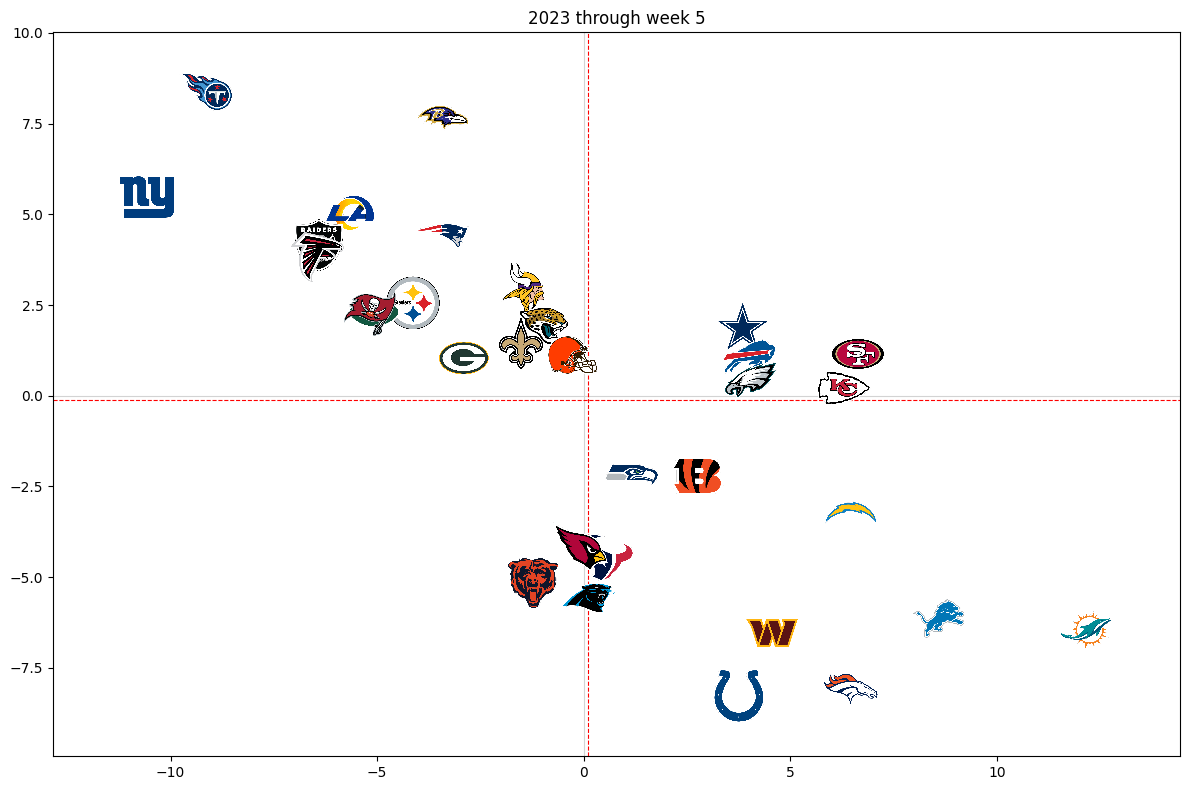

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/nfl/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [68]:
plot_team_scatter(power_ratings, 'off', 'def', '2023 through week 5')

In [69]:
griff = pd.read_clipboard()

In [70]:
griff

,team,ovr,off,def
0,SF,8.6,4.5,4.1
1,BUF,6.9,4.2,2.7
2,KC,6.4,4.4,2.0
3,PHI,4.5,3.6,0.9
4,MIA,4.4,5.3,-0.9
5,DAL,4.2,1.8,2.4
6,DET,3.7,2.8,0.9
7,BAL,3.0,0.8,2.2
8,LAC,1.9,3.2,-1.3
9,CLE,1.4,-2.4,3.8


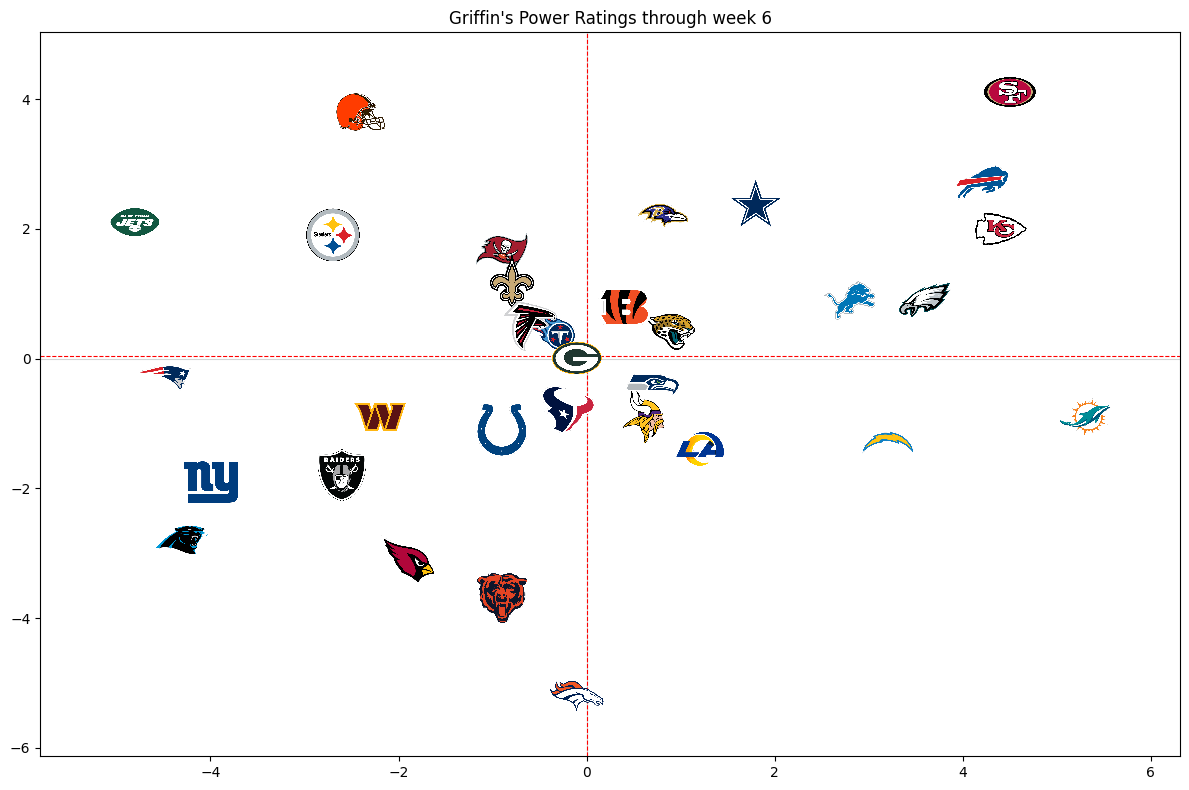

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/nfl/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [71]:
plot_team_scatter(griff, 'off', 'def', 'Griffin\'s Power Ratings through week 6')

# Odds API

In [ ]:

# Load environment variables from .env file
load_dotenv()

# Access the variables
API_KEY = os.getenv("API_KEY")
db_password = os.getenv("DB_PASSWORD")

SPORT = 'americanfootball_nfl' # use the sport_key from the /sports endpoint below, or use 'upcoming' to see the next 8 games across all sports

REGIONS = 'us' # uk | us | eu | au. Multiple can be specified if comma delimited

MARKETS = 'spreads,totals' # h2h | spreads | totals. Multiple can be specified if comma delimited

ODDS_FORMAT = 'american' # decimal | american

DATE_FORMAT = 'iso' # iso | unix

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
#
# First get a list of in-season sports
#   The sport 'key' from the response can be used to get odds in the next request
#
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

# sports_response = requests.get(
#     'https://api.the-odds-api.com/v4/sports', 
#     params={
#         'api_key': API_KEY
#     }
# )

In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
#
# Now get a list of live & upcoming games for the sport you want, along with odds for different bookmakers
# This will deduct from the usage quota
# The usage quota cost = [number of markets specified] x [number of regions specified]
# For examples of usage quota costs, see https://the-odds-api.com/liveapi/guides/v4/#usage-quota-costs
#
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

odds_response = requests.get(
    f'https://api.the-odds-api.com/v4/sports/{SPORT}/odds',
    params={
        'api_key': API_KEY,
        'regions': REGIONS,
        'markets': MARKETS,
        'oddsFormat': ODDS_FORMAT,
        'dateFormat': DATE_FORMAT,
    }
)

if odds_response.status_code != 200:
    print(f'Failed to get odds: status_code {odds_response.status_code}, response body {odds_response.text}')

else:
    odds_json = odds_response.json()
    print('Number of events:', len(odds_json))
    print(odds_json)

    # Check the usage quota
    print('Remaining requests', odds_response.headers['x-requests-remaining'])
    print('Used requests', odds_response.headers['x-requests-used'])

In [ ]:
len(odds_json)

In [ ]:
len(odds_json[0])

In [ ]:
power_rating = {}
hfa = {}
for year in range(2018, 2023):
    pr, hf = derive_market_power_ratings(year)
    power_rating[year] = pr
    hfa[year] = hf
    _ = plot_team_scatter(pr, 'off', 'def', title=f'Market Derived Power Ratings - {year} Season - home field {hfa[year]}', ax_labels=('Offensive Power Rating', 'Defensive Power Rating'), mean_reference=False)